In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [3]:
for_sale_path = "For_Sale_Inventory.csv"
median_list_path = "Median_List_Price.csv"
median_sale_path = "Median_Sale_Price.csv"

for_sale_inventory_df = pd.read_csv(for_sale_path)
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

Housing Inventory: How has the housing inventory fluctuated since pre-pandemic times?

In [4]:
region_df = for_sale_inventory_df.rename(columns={"2018-03-31":"March 2018","2018-09-30":"September 2018",
                                                "2019-03-31":"March 2019","2019-09-30":"September 2019",
                                                "2020-03-31":"March 2020","2020-09-30":"September 2020",
                                                "2021-03-31":"March 2021","2021-09-30":"September 2021",
                                                "2022-03-31":"March 2022","2022-09-30":"September 2022",
                                                "2023-03-31":"March 2023","2023-06-30":"June 2023",})
housing_inventory = region_df[["RegionID","RegionName","RegionType","StateName",
                                           "March 2018","September 2018","March 2019","September 2019","March 2020","September 2020","March 2021",
                                           "September 2021","March 2022","September 2022","March 2023","June 2023"]].copy()
housing_inventory   

,RegionID,RegionName,RegionType,StateName,March 2018,September 2018,March 2019,September 2019,March 2020,September 2020,March 2021,September 2021,March 2022,September 2022,March 2023,June 2023
0,102001,United States,country,NaN,1421528.0,1723098.0,1449965.0,1665421.0,1309043.0,1283020.0,882081.0,1083989.0,726913.0,1101482.0,835429.0,906804.0
1,394913,"New York, NY",msa,NY,73707.0,90050.0,78192.0,93359.0,74371.0,82809.0,61966.0,69101.0,48039.0,60262.0,43253.0,46180.0
2,753899,"Los Angeles, CA",msa,CA,21998.0,30428.0,27132.0,30618.0,21194.0,25453.0,19497.0,21609.0,14653.0,22400.0,15214.0,15364.0
3,394463,"Chicago, IL",msa,IL,38581.0,49630.0,39387.0,51829.0,39339.0,42308.0,30715.0,39806.0,22775.0,31682.0,20922.0,22700.0
4,394514,"Dallas, TX",msa,TX,24043.0,33512.0,28543.0,35472.0,27993.0,28526.0,17931.0,23945.0,14911.0,22863.0,17053.0,21731.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,753929,"Zapata, TX",msa,TX,55.0,51.0,47.0,47.0,42.0,21.0,22.0,25.0,43.0,44.0,49.0,47.0
924,394743,"Ketchikan, AK",msa,AK,77.0,109.0,80.0,92.0,79.0,93.0,63.0,103.0,61.0,64.0,61.0,66.0
925,753874,"Craig, CO",msa,CO,115.0,169.0,104.0,175.0,134.0,181.0,83.0,82.0,52.0,84.0,48.0,77.0
926,395188,"Vernon, TX",msa,TX,21.0,37.0,47.0,34.0,35.0,23.0,16.0,31.0,28.0,36.0,40.0,45.0


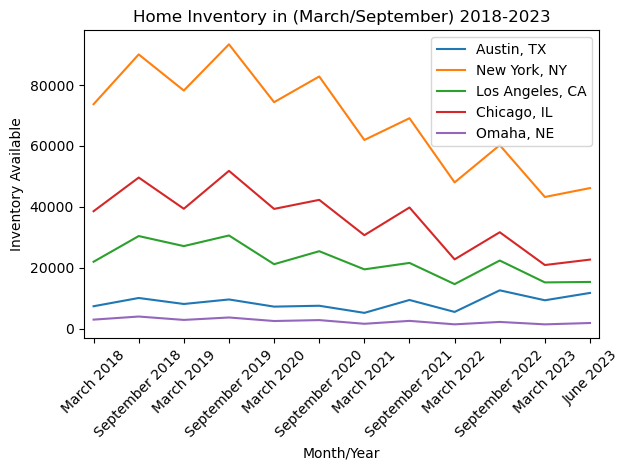

In [7]:
# Create a variable for each city we are analyzing for this project
homes_in_austin_tx = housing_inventory.loc[housing_inventory["RegionName"] == "Austin, TX"]
homes_in_omaha_ne = housing_inventory.loc[housing_inventory["RegionName"] == "Omaha, NE"]
homes_in_chicago_il = housing_inventory.loc[housing_inventory["RegionName"] == "Chicago, IL"]
homes_in_ny_ny = housing_inventory.loc[housing_inventory["RegionName"] == "New York, NY"]
homes_in_la_ca = housing_inventory.loc[housing_inventory["RegionName"] == "Los Angeles, CA"]


# Make a DataFrame using the loc function to find specific cities 
inventory_comparison = housing_inventory.loc[(housing_inventory["RegionName"] == "Austin, TX") |
                                             (housing_inventory["RegionName"] == "Omaha, NE") |
                                             (housing_inventory["RegionName"] == "Chicago, IL") |
                                             (housing_inventory["RegionName"] == "New York, NY") |
                                             (housing_inventory["RegionName"] == "Los Angeles, CA")
                                            ]

# Reset index to match the city and state we are analyzing 
inventory_comparison = inventory_comparison.set_index("RegionName")

# Find the row where each city is located 
housing_inventory.loc[housing_inventory["RegionName"] == "Omaha, NE"]
housing_inventory.loc[housing_inventory["RegionName"] == "New York, NY"]
housing_inventory.loc[housing_inventory["RegionName"] == "Chicago, IL"]
housing_inventory.loc[housing_inventory["RegionName"] == "Los Angeles, CA"]
housing_inventory.loc[housing_inventory["RegionName"] == "Austin, TX"]

# Find the inventory over the five-year period for each city 
ny_ny_inventory = housing_inventory.iloc[1,4:].to_list()
om_ne_inventory = housing_inventory.iloc[58,4:].to_list()
ch_il_inventory = housing_inventory.iloc[3,4:].to_list()
los_ca_inventory = housing_inventory.iloc[2,4:].to_list()
au_tx_inventory = housing_inventory.iloc[29,4:].to_list()

# Create a DataFrame that displays the housing inventory over a 5-year period for the five cities in the US
df = pd.DataFrame({
    "Austin, TX": au_tx_inventory,
    "New York, NY": ny_ny_inventory,
    "Los Angeles, CA": los_ca_inventory,
    "Chicago, IL": ch_il_inventory,
    "Omaha, NE": om_ne_inventory
}, index =  ["March 2018","September 2018","March 2019","September 2019","March 2020","September 2020","March 2021",
                                           "September 2021","March 2022","September 2022","March 2023","June 2023"])

line = df.plot.line()

# Set a Title and labels
plt.title("Home Inventory in (March/September) 2018-2023")
plt.xlabel("Month/Year")
plt.ylabel("Inventory Available")
plt.xlim(-0.22,11.2)

# Work with the x ticks
tick_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_labels = ["March 2018","September 2018","March 2019","September 2019","March 2020","September 2020","March 2021",
                                           "September 2021","March 2022","September 2022","March 2023","June 2023"] 
plt.xticks(tick_positions,tick_labels, rotation=45)

# Save our graph and show the graph
plt.tight_layout()
plt.savefig("Output/Pandemic-Home-Inventory.png")
plt.show()


How has the Pandemic impacted Home Sale Prices from 2018-2023 and how have home prices changed since the beginning of the pandemic? Which city/cities saw the greatest rate of increase in price? 

In [ ]:
def calculate_rate_of_increase(prices):
    return (prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0] * 100



In [ ]:
city_groups = df.groupby('RegionName')['Price'].apply(calculate_rate_of_increase)

List vs. Sold Listing prices that are currently available in the US?

In [ ]:
Where are the most affordable places to live in the United States in 2023 based on median price?